# Redes Neurais: Problemas de Classificacao

Autor: Arthur Schneider Figueira

## Lendo as bibliotecas

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-09-19 01:00:10.644675: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-19 01:00:10.645652: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 01:00:10.665255: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 01:00:10.665722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 01:00:11.104312: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

In [73]:
pd.set_option('display.max_columns', 25)

In [74]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Atividade

1. **(Sem Nota)** Drug 200: problema multiclasse. A base drug200.csv contém dados de saúde paciente dos pacientes e, baseado nisso, recomenda-se tomar um repectivo remédio condito na coluna Drug. Note que há 05 respostas diferentes (problema multiclasse). Portanto, sua última camada será construída como:
```
# Adicione a camada de saída
model6.add(tf.keras.layers.Dense(5, activation='softmax'))
#O valor 5 é porque vamos retornar apenas 1 output nessa camada de saída.
```
**Lembrete**: transforme cada opção num número de 1 a 5.



2. **(Com Nota)** Mushroom: problema binário. A base mushrooms.csv contém dados de **duas** espécies de cogumelos. A base está completamente criptografada e não há um dicionário.

**Projeto**:
* Testem diferentes arquiteturas para responder a esses problemas;
* Testem diferentes otimizadores;
* Dependendo da função de perda, adaptem o learning rate.

**Entrega:**
Realizem a predição da base mushrooms_AC.csv e salvem no drive da respectiva AC. Usem como nome do arquivo NOME_SOBRENOME_NOME2_SOBRENOME2.csv . Utilizem o formato padrão do pandas para exportar o arquivo.

A métrica para avaliar será a **acurácia**.

# Binário

In [75]:
df_mushroom = pd.read_csv('./mushrooms.csv')
df_mushroom.tail()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
7495,x,y,e,t,n,f,c,b,w,t,b,s,s,g,p,p,w,o,p,n,v,d,e
7496,f,s,n,f,f,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,l,p
7497,x,f,g,f,n,f,w,b,n,t,e,s,s,w,w,p,w,o,e,n,s,g,e
7498,x,s,n,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,n,v,g,p
7499,x,s,n,t,p,f,c,n,w,e,e,s,s,w,w,p,w,o,p,k,s,u,p


In [76]:
df_mushroom.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [77]:
for coluna in df_mushroom.columns:

    print(f"valores da coluna {coluna}")
    print(df_mushroom[coluna].value_counts())
    print("\n")

valores da coluna cap-shape
cap-shape
x    3369
f    2909
k     771
b     417
s      30
c       4
Name: count, dtype: int64


valores da coluna cap-surface
cap-surface
y    2995
s    2352
f    2149
g       4
Name: count, dtype: int64


valores da coluna cap-color
cap-color
n    2117
g    1693
e    1387
y     986
w     961
b     153
p     138
c      38
r      14
u      13
Name: count, dtype: int64


valores da coluna bruises
bruises
f    4382
t    3118
Name: count, dtype: int64


valores da coluna odor
odor
n    3260
f    1979
y     539
s     531
a     373
l     367
p     241
c     178
m      32
Name: count, dtype: int64


valores da coluna gill-attachment
gill-attachment
f    7308
a     192
Name: count, dtype: int64


valores da coluna gill-spacing
gill-spacing
c    6288
w    1212
Name: count, dtype: int64


valores da coluna gill-size
gill-size
b    5172
n    2328
Name: count, dtype: int64


valores da coluna gill-color
gill-color
b    1597
p    1377
w    1124
n     973
g     685
h   

In [78]:
df_mushroom_validacao = pd.read_csv('./mushrooms_AC.csv')


In [79]:
df_mushroom_validacao.columns

Index(['Unnamed: 0', 'index', 'cap-shape', 'cap-surface', 'cap-color',
       'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [80]:
df_mushroom_validacao.tail()

,Unnamed: 0,index,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
619,619,4123,f,f,y,f,f,f,c,b,h,e,b,k,k,n,p,p,w,o,l,h,v,g
620,620,6993,f,s,e,f,y,f,c,n,b,t,?,k,k,p,p,p,w,o,e,w,v,d
621,621,246,x,s,w,t,l,f,w,n,p,t,b,s,s,w,w,p,w,o,p,u,v,d
622,622,7935,k,y,e,f,y,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,d
623,623,3018,f,y,e,t,n,f,c,b,p,t,b,s,s,g,w,p,w,o,p,n,v,d


In [81]:
df_mushroom['class'].unique()

array(['e', 'p'], dtype=object)

In [82]:
len(df_mushroom)

7500

In [83]:
dict(df_mushroom['class'].value_counts())

{'e': 3885, 'p': 3615}

In [84]:
df_mushroom_dummies = pd.get_dummies(df_mushroom, columns = list(df_mushroom.columns), dtype=float,drop_first=True)

ID = df_mushroom_validacao.index

df_mushroom_validacao_ajustada = df_mushroom_validacao.drop(columns=['index', "Unnamed: 0"])

df_mushroom_validacao_dummies = pd.get_dummies(df_mushroom_validacao_ajustada, columns = list(df_mushroom_validacao_ajustada.columns), dtype=float,drop_first=True)

In [85]:
df_mushroom_dummies.tail()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,...,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class_p
7495,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7496,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7498,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7499,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [86]:
X = df_mushroom_dummies.drop(columns = ['class_p'])
y = df_mushroom_dummies.class_p
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023,stratify=y)
X_val = df_mushroom_validacao_dummies
ID = X_val.index

#Com o parametro stratify, a divisao das bases mantera uma qt equilibrada de M e F

In [87]:
print(f" Treino {len(X_train)}, Teste {len(X_test)}, Validacao {len(df_mushroom_validacao_dummies)}")

 Treino 5250, Teste 2250, Validacao 624


## Identifica colunas diferentes na base de validação e de teste

In [88]:
colunas_diferentes = X_train.columns.difference(X_val.columns)

X_train = X_train.drop(columns=colunas_diferentes)
X_test = X_test.drop(columns=colunas_diferentes)

## Criando modelos e realizando treinamento

* Early Stopping

In [89]:
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

* Learning Rate

In [90]:
# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 50:
        return 0.005
    elif epoch < 100:
        return 0.001
    elif epoch < 150:
        return 0.0005
    else:
        return 0.0001

# Criando o callback para o Learning Rate Scheduler
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Optei por alterar o learning rate a cada 50 epocas,
# pois o early stop vai encerrar o treinamento quando 50 epocas se passarem sem melhorar o modelo.

Lembrete: esses parâmetros (early stopping e learning rate) são utilizados como callbacks:



```
# Treinando o modelo
model.fit(X_train, y_train, epochs=200, batch_size=16, callbacks=[lr_scheduler_callback,early_stopping_callback])
```



### Otimizador: SGD

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD)

In [91]:
# Crie o modelo sequencial
model1 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model1.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model1.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model1.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model1.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model1.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model1.compile(optimizer=tf.keras.optimizers.SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [92]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               11648     
                                                                 
 dense_57 (Dense)            (None, 256)               33024     
                                                                 
 dense_58 (Dense)            (None, 512)               131584    
                                                                 
 dense_59 (Dense)            (None, 512)               262656    
                                                                 
 dense_60 (Dense)            (None, 256)               131328    
                                                                 
 dense_61 (Dense)            (None, 128)               32896     
                                                                 
 dense_62 (Dense)            (None, 64)               

In [93]:
history1 = model1.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )

Epoch 1/200
3/3 [==============================] - 0s 49ms/step - loss: 0.6917 - accuracy: 0.5429 - val_loss: 0.6911 - val_accuracy: 0.5427 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6912 - accuracy: 0.5491 - val_loss: 0.6906 - val_accuracy: 0.5498 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6908 - accuracy: 0.5514 - val_loss: 0.6902 - val_accuracy: 0.5542 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6904 - accuracy: 0.5549 - val_loss: 0.6898 - val_accuracy: 0.5560 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6900 - accuracy: 0.5598 - val_loss: 0.6894 - val_accuracy: 0.5587 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6895 - accuracy: 0.5611 - val_loss: 0.6889 - val_accuracy: 0.5609 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6891 - a

In [94]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss1 = history1.history['loss']
test_loss1 = history1.history['val_loss']

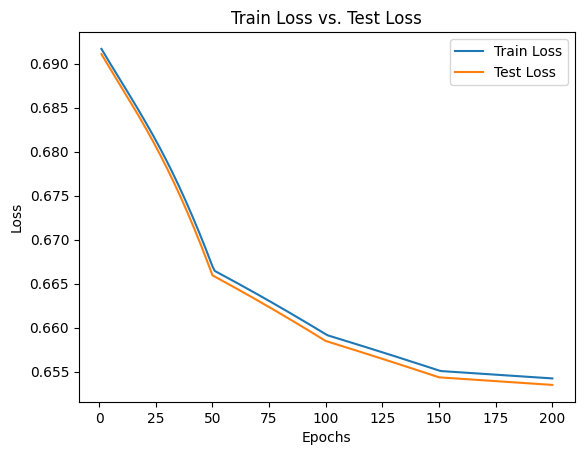

In [95]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss1) + 1)
plt.plot(epochs, train_loss1, label='Train Loss')
plt.plot(epochs, test_loss1, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: Adam

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Epoch 1/200
3/3 [==============================] - 1s 45ms/step - loss: 0.8086 - accuracy: 0.4745 - val_loss: 0.5014 - val_accuracy: 0.9218 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 0.4667 - accuracy: 0.7610 - val_loss: 0.3416 - val_accuracy: 0.9693 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 0.2674 - accuracy: 0.9659 - val_loss: 0.0560 - val_accuracy: 0.9831 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0730 - accuracy: 0.9829 - val_loss: 0.0483 - val_accuracy: 0.9929 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0652 - accuracy: 0.9895 - val_loss: 0.0061 - val_accuracy: 0.9978 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0148 - accuracy: 0.9971 - val_loss: 0.0026 - val_accuracy: 0.9996 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0064 - a

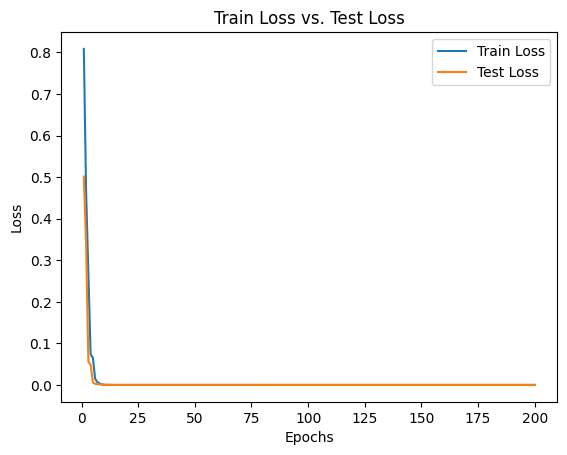

In [96]:
# Crie o modelo sequencial
model2 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model2.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss2) + 1)
plt.plot(epochs, train_loss2, label='Train Loss')
plt.plot(epochs, test_loss2, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador RMSprop

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/RMSprop)

Epoch 1/200
3/3 [==============================] - 0s 46ms/step - loss: 3.1216 - accuracy: 0.4440 - val_loss: 0.6884 - val_accuracy: 0.5178 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6360 - accuracy: 0.6566 - val_loss: 0.6343 - val_accuracy: 0.4822 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 0.5130 - accuracy: 0.6050 - val_loss: 0.3120 - val_accuracy: 0.9484 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1701 - accuracy: 0.9634 - val_loss: 0.0204 - val_accuracy: 0.9942 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0777 - accuracy: 0.9771 - val_loss: 0.7904 - val_accuracy: 0.7116 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.4989 - accuracy: 0.8162 - val_loss: 0.0525 - val_accuracy: 0.9822 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0449 - a

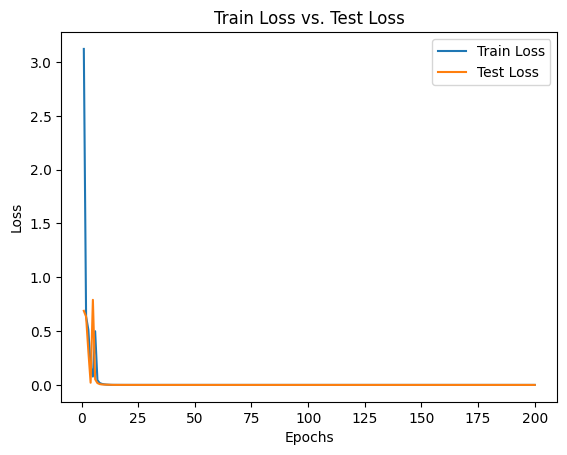

In [97]:
# Crie o modelo sequencial
model3 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model3.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model3.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model3.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model3.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model3.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model3.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss3 = history3.history['loss']
test_loss3 = history3.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss3) + 1)
plt.plot(epochs, train_loss3, label='Train Loss')
plt.plot(epochs, test_loss3, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: Adagrad

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Adagrad)

Epoch 1/200
3/3 [==============================] - 0s 48ms/step - loss: 0.6907 - accuracy: 0.5120 - val_loss: 0.6891 - val_accuracy: 0.5436 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6879 - accuracy: 0.5716 - val_loss: 0.6863 - val_accuracy: 0.6293 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6851 - accuracy: 0.6697 - val_loss: 0.6835 - val_accuracy: 0.7302 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6823 - accuracy: 0.7663 - val_loss: 0.6806 - val_accuracy: 0.8093 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6795 - accuracy: 0.8246 - val_loss: 0.6777 - val_accuracy: 0.8698 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6766 - accuracy: 0.8728 - val_loss: 0.6747 - val_accuracy: 0.8929 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 14ms/step - loss: 0.6735 - a

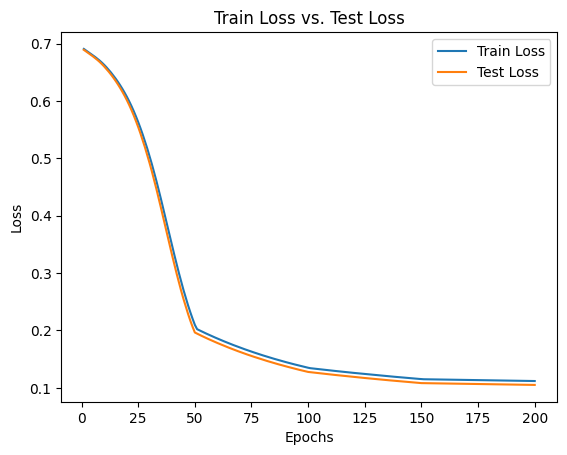

In [98]:
# Crie o modelo sequencial
model4 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model4.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model4.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model4.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model4.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model4.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model4.compile(optimizer=tf.keras.optimizers.Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

history4 = model4.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss4 = history4.history['loss']
test_loss4 = history4.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss4) + 1)
plt.plot(epochs, train_loss4, label='Train Loss')
plt.plot(epochs, test_loss4, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: Ada Delta

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Adadelta)

Epoch 1/200
3/3 [==============================] - 1s 46ms/step - loss: 0.6912 - accuracy: 0.5657 - val_loss: 0.6907 - val_accuracy: 0.5867 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6909 - accuracy: 0.5895 - val_loss: 0.6903 - val_accuracy: 0.6107 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6905 - accuracy: 0.6088 - val_loss: 0.6899 - val_accuracy: 0.6298 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6901 - accuracy: 0.6307 - val_loss: 0.6895 - val_accuracy: 0.6529 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6896 - accuracy: 0.6524 - val_loss: 0.6891 - val_accuracy: 0.6742 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6892 - accuracy: 0.6701 - val_loss: 0.6886 - val_accuracy: 0.6956 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6888 - a

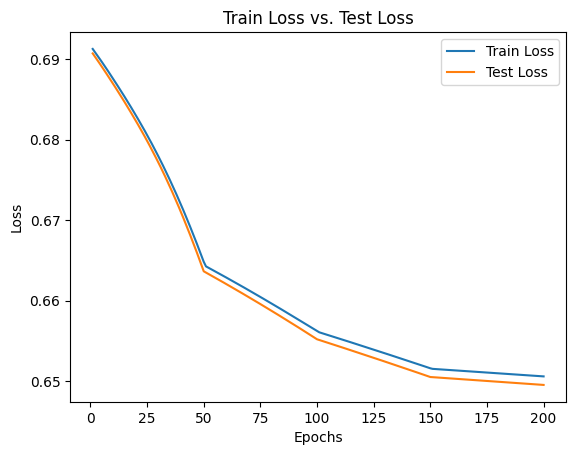

In [99]:
# Crie o modelo sequencial
model5 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model5.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model5.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model5.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model5.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model5.compile(optimizer=tf.keras.optimizers.Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

history5 = model5.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss5 = history5.history['loss']
test_loss5 = history5.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss5) + 1)
plt.plot(epochs, train_loss5, label='Train Loss')
plt.plot(epochs, test_loss5, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: N Adam

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Nadam)

Epoch 1/200
3/3 [==============================] - 1s 47ms/step - loss: 0.5413 - accuracy: 0.7457 - val_loss: 0.5962 - val_accuracy: 0.9027 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 4.3818 - accuracy: 0.6253 - val_loss: 0.4488 - val_accuracy: 0.7458 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 0.3651 - accuracy: 0.8907 - val_loss: 0.1329 - val_accuracy: 0.9818 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1126 - accuracy: 0.9779 - val_loss: 0.0419 - val_accuracy: 0.9920 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0357 - accuracy: 0.9910 - val_loss: 0.0087 - val_accuracy: 0.9978 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0110 - accuracy: 0.9975 - val_loss: 9.4468e-04 - val_accuracy: 1.0000 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0015

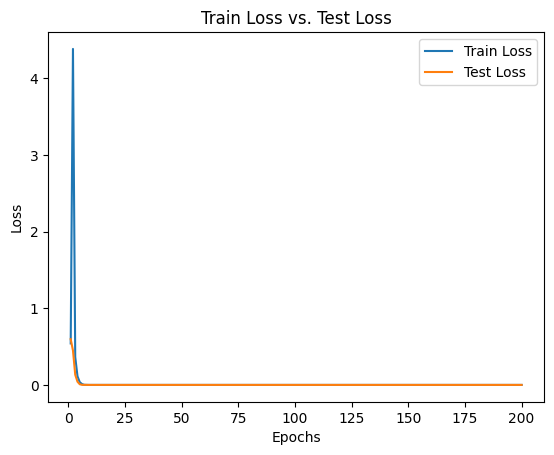

In [101]:
# Crie o modelo sequencial
model6 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model6.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model6.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model6.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model6.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model6.compile(optimizer=tf.keras.optimizers.Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

history6 = model6.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss6 = history6.history['loss']
test_loss6 = history6.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss6) + 1)
plt.plot(epochs, train_loss6, label='Train Loss')
plt.plot(epochs, test_loss6, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
[float(x) for x in model1.predict(X_val)]

20/20 [==============================] - 0s 674us/step


[0.48935064673423767,
 0.44945865869522095,
 0.5017313361167908,
 0.473989337682724,
 0.5185456275939941,
 0.518035352230072,
 0.5099489092826843,
 0.4644980728626251,
 0.46421292424201965,
 0.46191519498825073,
 0.5001480579376221,
 0.5164462924003601,
 0.492123544216156,
 0.45857101678848267,
 0.4802543520927429,
 0.4630070626735687,
 0.4566454291343689,
 0.46189287304878235,
 0.458970308303833,
 0.4619075059890747,
 0.4542725086212158,
 0.46278318762779236,
 0.5025632381439209,
 0.4450269937515259,
 0.48002496361732483,
 0.49659690260887146,
 0.5024225115776062,
 0.4583342373371124,
 0.4698226749897003,
 0.47404029965400696,
 0.4964561462402344,
 0.5075531601905823,
 0.43506017327308655,
 0.45879533886909485,
 0.46366527676582336,
 0.4368341267108917,
 0.5087300539016724,
 0.4639570116996765,
 0.4645388424396515,
 0.44256624579429626,
 0.49790459871292114,
 0.4722597897052765,
 0.5122919082641602,
 0.4712444543838501,
 0.498028039932251,
 0.47955453395843506,
 0.5007935762405396,
 0

In [36]:
transforma_bin = lambda x: 1 if x > 0.5 else 0

In [ ]:
# print('SGD',accuracy_score(y_val, [transforma_bin(float(x)) for x in model1.predict(X_val)]))
# print('Adam',accuracy_score(y_val, [transforma_bin(float(x)) for x in model2.predict(X_val)]))
# print('RMSProp',accuracy_score(y_val, [transforma_bin(float(x)) for x in model3.predict(X_val)]))
# print('Ada Grad',accuracy_score(y_val, [transforma_bin(float(x)) for x in model4.predict(X_val)]))
# print('Ada Delta',accuracy_score(y_val, [transforma_bin(float(x)) for x in model5.predict(X_val)]))
# print('N Adam',accuracy_score(y_val, [transforma_bin(float(x)) for x in model6.predict(X_val)]))

In [ ]:
# print('Adam: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model2.predict(X_test)]))
# print('Adam: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model2.predict(X_train)]))

In [ ]:
# print('Ada Delta: validacao',accuracy_score(y_val, [transforma_bin(float(x)) for x in model5.predict(X_val)]))
# print('Ada Delta: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model5.predict(X_test)]))
# print('Ada Delta: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model5.predict(X_train)]))

In [104]:
#Criando o DataFrame que Irá Armazenar os Resultados
result = pd.DataFrame(index=ID)

In [105]:
len(X_val.columns)

90

In [106]:
len(X_train.columns)

90

In [107]:
y_pred = model1.predict(np.array(X_val)).flatten()

result['Model_1'] = y_pred

20/20 [==============================] - 0s 645us/step


In [109]:
y_pred = model2.predict(np.array(X_val)).flatten()

result['Model_2'] = y_pred

20/20 [==============================] - 0s 586us/step


In [110]:
y_pred = model3.predict(np.array(X_val)).flatten()

result['Model_3'] = y_pred

20/20 [==============================] - 0s 615us/step


In [111]:
y_pred = model4.predict(np.array(X_val)).flatten()

result['Model_4'] = y_pred

20/20 [==============================] - 0s 637us/step


In [112]:
y_pred = model5.predict(np.array(X_val)).flatten()

result['Model_5'] = y_pred

20/20 [==============================] - 0s 634us/step


In [113]:
y_pred = model6.predict(np.array(X_val)).flatten()

result['Model_6'] = y_pred

20/20 [==============================] - 0s 584us/step


## Salvando dataframe com predições

In [58]:
result_export = result[['Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5', 'Model_6']]

result_export.to_csv('./base_ac3.csv')